Average path length and clustering coefficient of Erdős–Rényi random graphs.

Create large Erdős–Rényi random graphs (n = 500) for different p.

a. Calculate the average path length of the graph for each p and plot your results. Verify the theoretical approximations for small and large p, as shown in figure 12.5(a).

b. Calculate the clustering coefficient of the graph as a function of p and show that it is equal to p, as shown in figure 12.5(b).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

probabilities=np.logspace(np.log10(0.015), np.log10(1), 40)
n = 500
averagePathLengths = []

# Iterate over rows (p values)
for i, p in enumerate(tqdm(probabilities)):
    adjMatrix = np.zeros((n, n))
    randMatrix = np.random.uniform(low=0.0, high=1.0, size=(n, n))

    for k in range(n):
        for l in range(k + 1, n):
            if randMatrix[k, l] <= p:
                adjMatrix[k, l] = 1
                adjMatrix[l, k] = 1

    
    pathMatrix = np.ones((n, n)) * (-1)
    q = 1
    offCount = n + 1

    while offCount > n:
        resMat = np.linalg.matrix_power(adjMatrix, q)

        for s in range(n):
            for t in range(n):
                if resMat[s, t] != 0 and pathMatrix[s, t] == -1 and pathMatrix[t, s] == -1 and s != t:
                    pathMatrix[s, t] = q
                    pathMatrix[t, s] = q

        offCount = np.count_nonzero(pathMatrix == -1)
        q += 1

    totalPathLength = np.sum(pathMatrix) + n
    averagePathLength = totalPathLength / (n * (n - 1))

    
    averagePathLengths.append(averagePathLength)


100%|██████████| 40/40 [00:11<00:00,  3.45it/s]


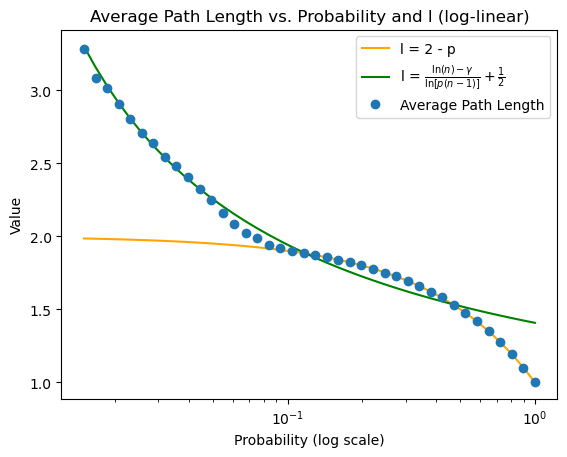

In [4]:
import matplotlib.pyplot as plt

gamma = 0.57722
L = [(np.log(n) - gamma) / (np.log(p * (n - 1))) + 1 / 2 for p in probabilities]

# Create a log-log plot
plt.semilogx(probabilities, 2 - probabilities, color='orange', label='l = 2 - p')
plt.semilogx(probabilities, L, color='green', label=r'l = $\frac{\ln(n) - \gamma}{\ln[p(n - 1)]} + \frac{1}{2}$')
plt.semilogx(probabilities, averagePathLengths, marker='o',linestyle='None', label='Average Path Length')
plt.title('Average Path Length vs. Probability and l (log-linear)')
plt.xlabel('Probability (log scale)')
plt.ylabel('Value')
plt.legend()
plt.show()

In [5]:
probabilities=np.logspace(np.log10(0.015), np.log10(1), 40)
n = 500
clusteringCoeffList = []

# Iterate over rows (p values)
for i, p in enumerate(tqdm(probabilities)):
    adjMatrix = np.zeros((n, n))
    randMatrix = np.random.uniform(low=0.0, high=1.0, size=(n, n))

    for k in range(n):
        for l in range(k + 1, n):
            if randMatrix[k, l] <= p:
                adjMatrix[k, l] = 1
                adjMatrix[l, k] = 1

    cubeAdjMatrix = np.linalg.matrix_power(adjMatrix,3)
    nominator= np.trace(cubeAdjMatrix)
    degrees = np.sum(adjMatrix, axis=1, dtype='int')
    tmpFactor = [degree*(degree-1) for degree in degrees]
    denominator = np.sum(tmpFactor)

    clusteringCoeff = nominator/denominator
    clusteringCoeffList.append(clusteringCoeff)

100%|██████████| 40/40 [00:01<00:00, 26.21it/s]


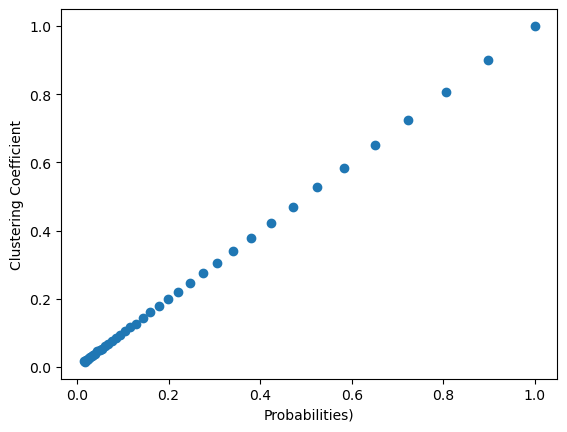

In [6]:
plt.plot(probabilities, clusteringCoeffList, marker='o', linestyle='None')
plt.xlabel('Probabilities)')
plt.ylabel('Clustering Coefficient')
plt.show()